In [45]:
import pandas as pd
from io import StringIO

col_names = ['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post',
             'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 
             'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post',
             'qbelo2_post', 'score1', 'score2', 'quality', 'importance', 'total_rating']

# load dataset
data = pd.read_csv("nfl_elo.csv", header=None, names=col_names)
data = data.drop(0)

In [46]:
# Loop through rows and replace NaN values in 'playoff' with 'r', signifying "Regular Season"
for index, row in data.iterrows():
    if pd.isna(row['playoff']):
        data.at[index, 'playoff'] = 'r'        

# Dropping last 3 columns        
data = data.drop(['quality', 'importance', 'total_rating', 'date'], axis=1)

In [47]:
#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

l5 = le.fit_transform(data['playoff'])  
data.drop("playoff", axis=1, inplace=True)
data["playoff"] = l5

In [48]:
# Function to add column for win/loss result. 0 means team1 lost, 1 means team1 won. -1 indicates a tie.
def compare_scores(score1, score2):
    if score1 < score2:
        return 0
    elif score1 > score2:
        return 1
    else:
        return -1  # Return a special value indicating that the scores are equal

data['outcome'] = data.apply(lambda row: compare_scores(float(row['score1']), float(row['score2'])), axis=1)

# Remove rows where the scores are equal
data = data[data['outcome'] != -1]

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15069 entries, 1 to 15217
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          15069 non-null  object
 1   neutral         15069 non-null  object
 2   elo1_pre        15069 non-null  object
 3   elo2_pre        15069 non-null  object
 4   elo_prob1       15069 non-null  object
 5   elo_prob2       15069 non-null  object
 6   elo1_post       15069 non-null  object
 7   elo2_post       15069 non-null  object
 8   qbelo1_pre      15069 non-null  object
 9   qbelo2_pre      15069 non-null  object
 10  qb1_value_pre   15069 non-null  object
 11  qb2_value_pre   15069 non-null  object
 12  qb1_adj         15069 non-null  object
 13  qb2_adj         15069 non-null  object
 14  qbelo_prob1     15069 non-null  object
 15  qbelo_prob2     15069 non-null  object
 16  qb1_game_value  15069 non-null  object
 17  qb2_game_value  15069 non-null  object
 18  qb1_va

In [50]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt #so you can draw

In [52]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target/Outcome
# use the .drop() method to gather all features except Target/Outcome
# the axis argument refers to columns (1); a 0 would represent rows
scaler.fit(data.drop('outcome', axis=1))
# Use scaler object to conduct a transform
scaled_features = scaler.transform(data.drop('outcome',axis=1))#this does the standardization

In [53]:
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
#see what you did
data_feat.head()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,...,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,team1,team2,qb1,qb2,playoff
0,-2.209949,-0.082145,1.640269,1.418467,0.268167,-0.268167,1.200130,1.798469,1.683568,1.429136,...,-1.175996,1.232109,1.813680,-1.172667,1.468332,1.006778,-0.974653,1.563539,0.789391,0.022504
1,-2.209949,-0.082145,-1.624783,-0.479055,-0.910380,0.910380,-1.836317,-0.214945,-1.669304,-0.489456,...,-1.216065,-1.890359,-0.212817,-0.799584,1.759892,-1.479349,1.607859,-1.677005,1.105431,0.022504
2,-2.209949,-0.082145,-0.186920,-0.407535,0.245745,-0.245745,-0.485525,-0.090724,-0.187515,-0.411482,...,-1.739222,-0.491443,-0.088839,-1.452480,-0.183841,1.106223,0.614585,0.021190,-1.122392,0.022504
3,-2.209949,-0.082145,-1.468643,-0.531399,-0.734399,0.734399,-1.742455,-0.206559,-1.501507,-0.540393,...,-1.449708,-1.777333,-0.211088,-1.452480,2.440198,-0.484898,-0.676671,1.439936,-1.376261,0.022504
4,-2.209949,-0.082145,0.576637,1.235303,-0.473412,0.473412,0.413946,1.362041,0.605473,1.269953,...,-1.698024,0.437334,1.396873,-0.239958,0.399279,0.111773,-1.173308,0.746685,0.152130,0.022504


In [54]:
#split dataset in features and target variable on the standardized data
X = data_feat
y = data['outcome'] # Target variable

In [55]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

In [56]:
def varyK(k, distMetric):
    results = []
    for i in range(1, k+1):
        model = KNeighborsClassifier(n_neighbors=i, metric=distMetric)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        results.append(metrics.accuracy_score(y_test, y_test_pred))
    return results

In [57]:
import math
#number of n =
n = X_train.shape[0]#how many samples in training
print(n)
print(math.sqrt(n))

10548
102.70345661174214


In [58]:
def varyWeightedK(k, distMetric):
    results = []
    for i in range(1, k+1):
        model = KNeighborsClassifier(n_neighbors=i,weights='distance', metric=distMetric)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        results.append(metrics.accuracy_score(y_test, y_test_pred))
    return results

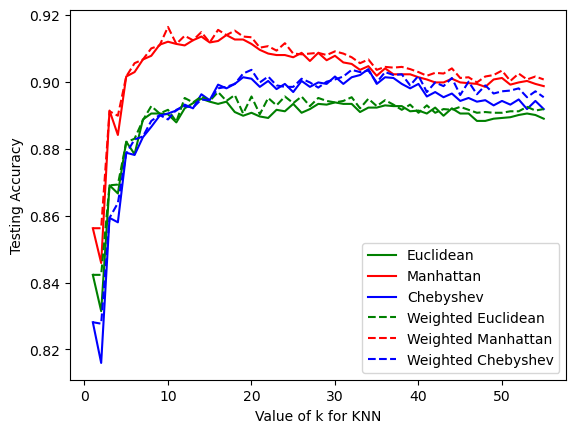

In [59]:
k=55
EucAccuracy = varyK(k, 'euclidean')
ManAccuracy = varyK(k, 'manhattan')
ChedAccuracy = varyK(k,'chebyshev' )
EucWeightedAccuracy = varyWeightedK(k, 'euclidean')
ManWeightedAccuracy = varyWeightedK(k, 'manhattan')
ChedWeightedAccuracy = varyWeightedK(k,'chebyshev' )
kneighbors = [*range(1, k+1)]
fig, ax = plt.subplots()
ax.plot(kneighbors, EucAccuracy, color='green', label='Euclidean')
ax.plot(kneighbors, ManAccuracy, color='red', label='Manhattan')
ax.plot(kneighbors, ChedAccuracy, color='blue', label='Chebyshev')
ax.plot(kneighbors, EucWeightedAccuracy, linestyle='--', color='green', label='Weighted Euclidean')
ax.plot(kneighbors, ManWeightedAccuracy, linestyle='--', color='red', label='Weighted Manhattan')
ax.plot(kneighbors, ChedWeightedAccuracy, linestyle='--', color='blue', label='Weighted Chebyshev')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
ax.legend(loc= 'lower right')
plt.show()